#  Problem Identification:-
### The primary problem addressed in this is the lack of uniformity in seed varieties obtained from crop production, particularly dry beans, necessitating the development of a computer vision system for seed classification. The challenge lies in distinguishing between seven different registered varieties of dry beans with similar features. Four classification models— “k-Nearest Neighbors (kNN), Decision Tree, Random Forest and XGBOOST” are compared for their respective performance metrics. It also addresses the demand for obtaining uniform bean varieties, crucial for sustainable agricultural practices and meeting market standards.

# Importing Liberaries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Dataset

In [2]:
df=pd.read_excel("E://Term 4//DryBeanDataset//Dry_Bean_Dataset.xlsx")

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Data Exploration

In [4]:
#Checking Datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
df.shape

(13611, 17)

### Finding Null Values

In [6]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
#Getting a description of the dataset

df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### Droping Duplicate Values

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#Checking the number of rows and columns after droping duplicate values

df.shape

(13543, 17)

In [10]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### Checking Class Imbalance

In [11]:
df.value_counts("Class")

#From the below result we can say that the dataset is kind of a balanced dataset

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
dtype: int64

### Correlation Matrix

In [12]:
round(df.corr(),2)

C:\Users\HP\AppData\Local\Temp\ipykernel_1196\2139689135.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr(),2)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.00,0.97,0.93,0.95,0.24,0.27,1.00,0.98,0.05,-0.20,-0.36,-0.27,-0.85,-0.64,-0.27,-0.36
Perimeter,0.97,1.00,0.98,0.91,0.39,0.39,0.97,0.99,-0.02,-0.30,-0.55,-0.41,-0.87,-0.77,-0.41,-0.43
MajorAxisLength,0.93,0.98,1.00,0.83,0.55,0.54,0.93,0.96,-0.08,-0.28,-0.60,-0.57,-0.78,-0.86,-0.57,-0.48
MinorAxisLength,0.95,0.91,0.83,1.00,-0.01,0.02,0.95,0.95,0.15,-0.16,-0.21,-0.02,-0.95,-0.48,-0.02,-0.27
AspectRation,0.24,0.39,0.55,-0.01,1.00,0.92,0.25,0.31,-0.37,-0.27,-0.76,-0.99,0.02,-0.84,-0.98,-0.45
Eccentricity,0.27,0.39,0.54,0.02,0.92,1.00,0.27,0.32,-0.32,-0.30,-0.72,-0.97,0.02,-0.86,-0.98,-0.45
ConvexArea,1.00,0.97,0.93,0.95,0.25,0.27,1.00,0.99,0.05,-0.21,-0.36,-0.27,-0.85,-0.64,-0.28,-0.36
EquivDiameter,0.98,0.99,0.96,0.95,0.31,0.32,0.99,1.00,0.03,-0.23,-0.44,-0.33,-0.89,-0.71,-0.33,-0.39
Extent,0.05,-0.02,-0.08,0.15,-0.37,-0.32,0.05,0.03,1.00,0.19,0.34,0.35,-0.14,0.24,0.35,0.15
Solidity,-0.20,-0.30,-0.28,-0.16,-0.27,-0.30,-0.21,-0.23,0.19,1.00,0.61,0.30,0.15,0.34,0.31,0.70


#### From the above Correlation Matrix we can Say that 'Area' is having very high positive correlation with 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea' and	'EquivDiameter'. Therefore, we will not be considering the variables (while building our training model) which is having very high positive correlation with 'Area'.

# Graphs

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


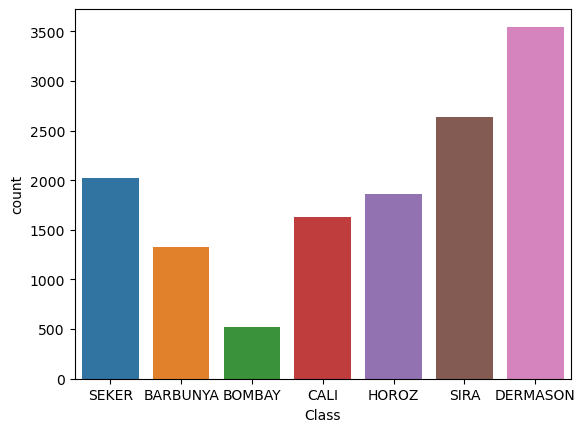

In [13]:
print(df['Class'].value_counts())
b= sns.countplot(x='Class', data=df)

### Class Distribution Interpretation:-
#### DERMASON (3546): The highest-class count, indicating that the dataset has a substantial number of instances belonging to the "DERMASON" class. This suggests that "DERMASON" is the most prevalent category in your dataset.
#### SIRA (2636): The second-highest class count, indicating a significant representation of the "SIRA" class in the dataset. While not as prevalent as "DERMASON," it still constitutes a substantial portion of the data.
#### SEKER (2027): The third-highest class count, signifying a notable presence of the "SEKER" class in the dataset. This class has a lower count compared to the first two but is still a considerable part of the dataset.
#### HOROZ (1860): The "HOROZ" class has a substantial count, suggesting a meaningful representation in the dataset. It may play a significant role in the overall distribution.
#### CALI (1630): The "CALI" class, with a count of 1630, represents a significant portion of the data. While not as prevalent as some other classes, it is still a substantial category.
#### BARBUNYA (1322): The "BARBUNYA" class has a count of 1322, indicating a presence in the dataset. It contributes to the diversity of classes but has a lower count compared to the previously mentioned classes.
#### BOMBAY (522): "BOMBAY" has the lowest count among the listed classes, suggesting that it is a relatively less frequent category in the dataset. It may be considered a minority class.


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\2876139199.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


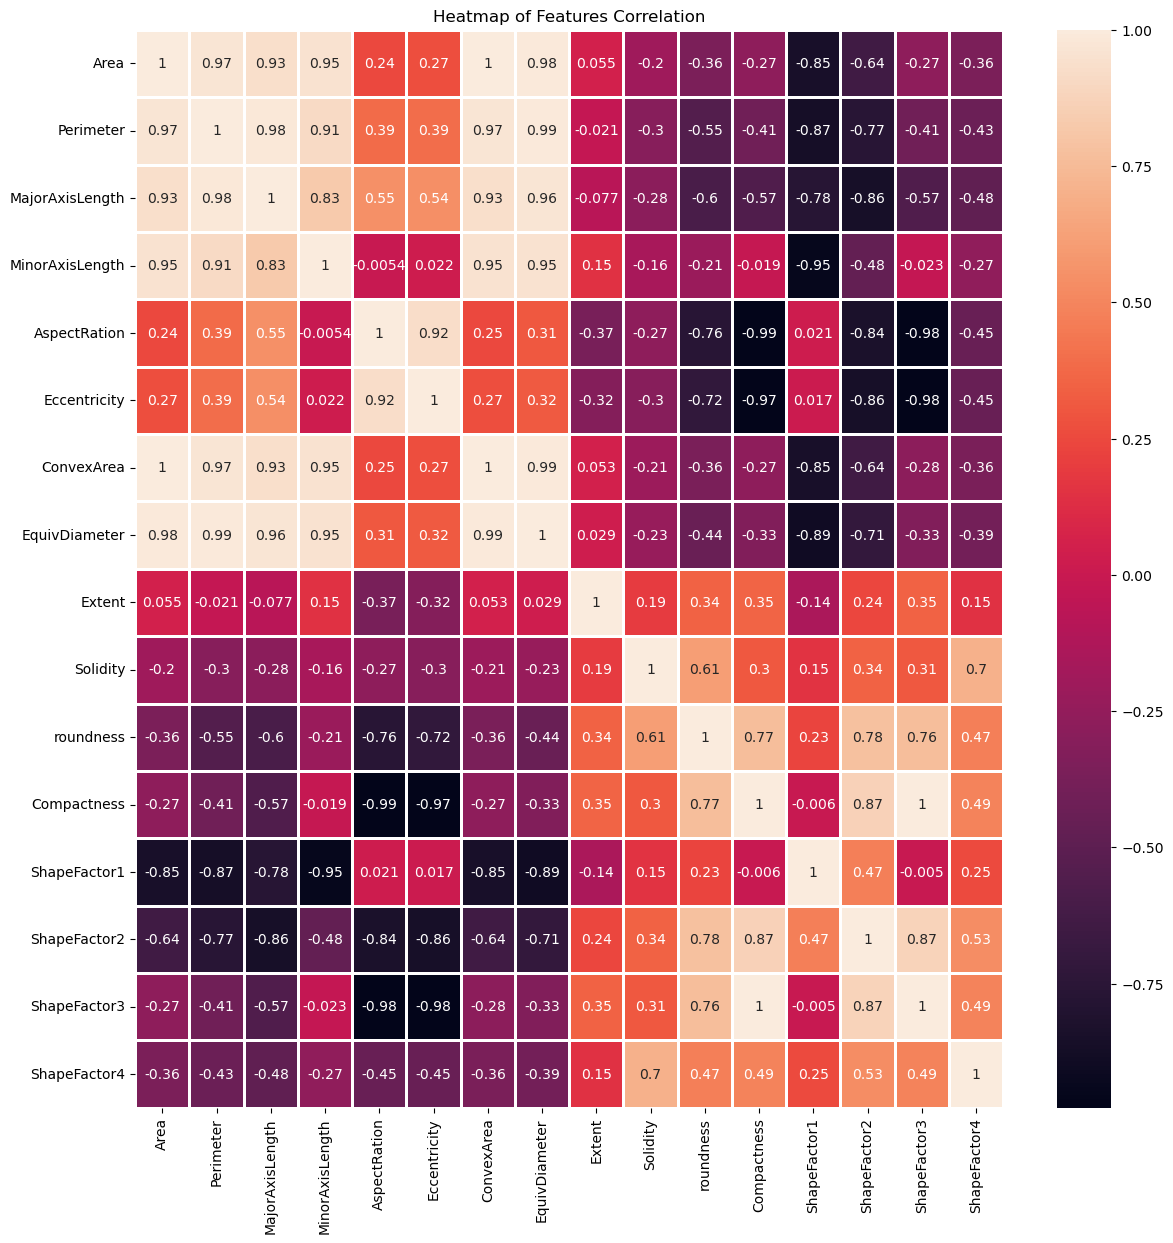

In [14]:
corr=df.corr()
plt.subplots(figsize = (14,14))
plt.title('Heatmap of Features Correlation')
hmap = sns.heatmap(corr, linewidth=1,annot=True,linecolor='white',robust=True)
plt.show()

### Heat Map Interpretation:-
##### The heat map illustrates the correlation coefficients between different morphological features of objects in the dataset. Each cell in the matrix represents the correlation between the corresponding pair of features. The values range from -1 to 1, where Positive values indicates a positive correlation, meaning that as one variable increases, the other variable also tends to increase, Negative values indicates a negative correlation, implying that as one variable increases, the other variable tends to decrease and, Values close to 0 suggests a weak or no linear correlation between the variables.

#### Let's interpret some of the key correlations:
#### 1. Area and Perimeter (0.97): A high positive correlation of 0.97 suggests a strong relationship between the area and perimeter of objects. As the area of an object increases, its perimeter also tends to increase, indicating that larger objects generally have longer perimeters.
#### 2. Major Axis Length and Minor Axis Length (0.83): The positive correlation of 0.83 implies a strong association between the lengths of the major and minor axes. Objects with longer major axes also tend to have longer minor axes, indicating an elongated shape.
#### 3. Aspect Ratio and Eccentricity (0.92): With a positive correlation of 0.92, there is a strong connection between aspect ratio and eccentricity. Objects with a higher aspect ratio (indicating elongation) also exhibit higher eccentricity, which means they deviate more from a perfect circle.
#### 4. Compactness and Aspect Ratio (-0.99): The strong negative correlation of -0.99 indicates a nearly perfect inverse relationship between compactness and aspect ratio. As an object becomes more compact (occupying less space), its aspect ratio (elongation) tends to decrease, and vice versa.
#### 5. ShapeFactor1 and ShapeFactor2 (-0.86): The negative correlation of -0.86 suggests an inverse relationship between ShapeFactor1 and ShapeFactor2. As the first shape factor increases, the second tends to decrease. These shape factors are likely capturing different aspects of the object's geometry.
#### 6. Extent and Solidity (0.19): The positive correlation of 0.19 indicates a weak tendency for objects with higher extent (measure of how much an object covers its bounding box) to also have higher solidity (measure of the convexity of the object). The relationship is not very strong but suggests a subtle connection between these two features.

#### Understanding these correlations helps in grasping the interdependencies between different morphological characteristics of objects in the dataset, providing valuable insights for further analysis or classification tasks.
#### These correlations provide insights into the relationships between different morphological features, which can be valuable for understanding the characteristics of objects in the dataset.


<Figure size 1400x1400 with 0 Axes>

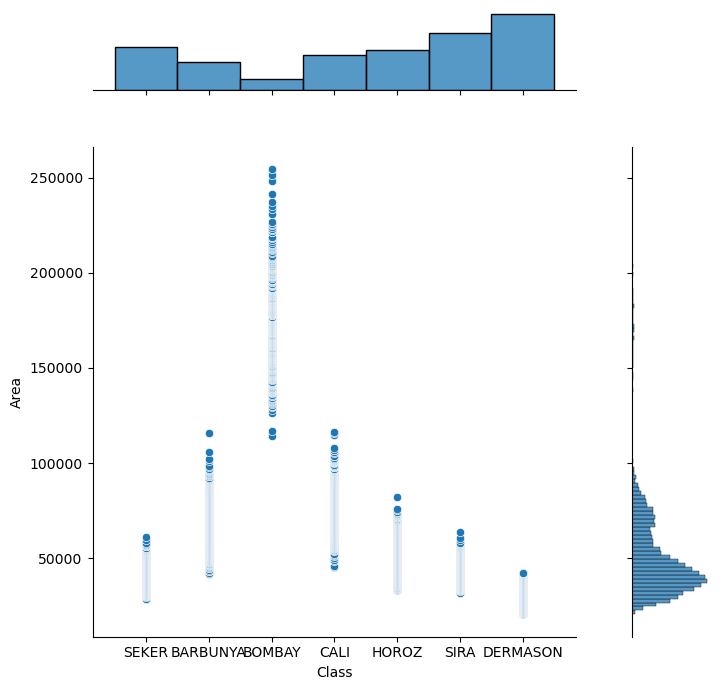

In [15]:
plt.figure(figsize = (14,14))
sns.jointplot(data=df, x="Class", y="Area", kind='scatter',height=7,ratio=4,space=0.7)
plt.show()

### Detection of Outliers 

Area
Skewness :  2.947


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


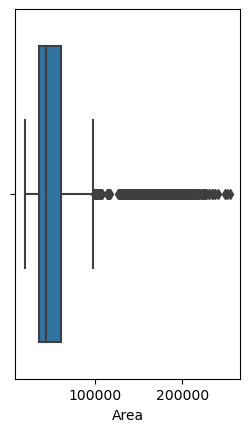

Perimeter
Skewness :  1.628


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


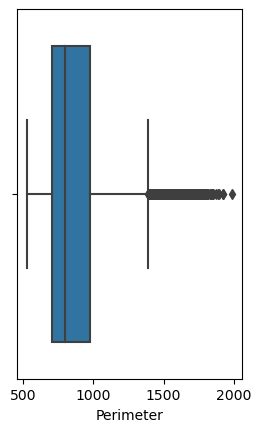

MajorAxisLength
Skewness :  1.366


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


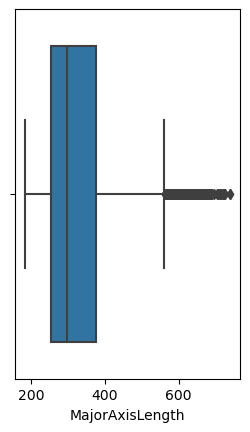

MinorAxisLength
Skewness :  2.232


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


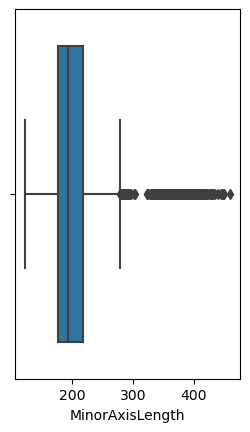

AspectRation
Skewness :  0.589


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


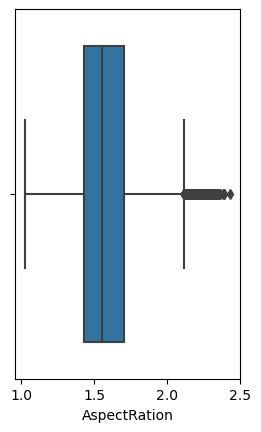

Eccentricity
Skewness :  -1.065


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


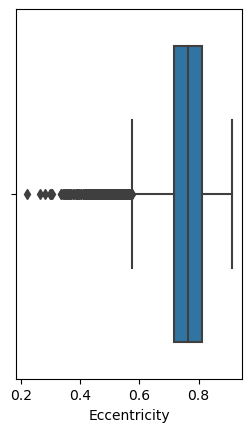

ConvexArea
Skewness :  2.936


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


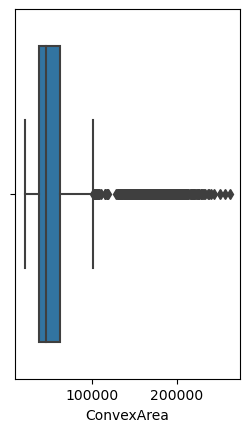

EquivDiameter
Skewness :  1.947


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


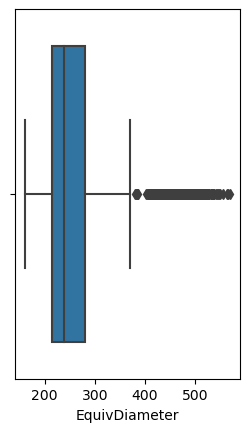

Extent
Skewness :  -0.896


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


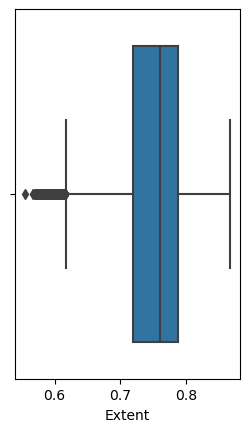

Solidity
Skewness :  -2.547


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


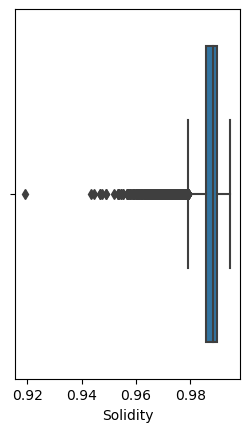

roundness
Skewness :  -0.649


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


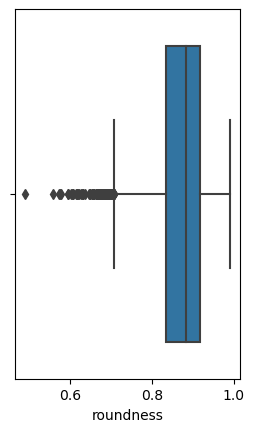

Compactness
Skewness :  0.036


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


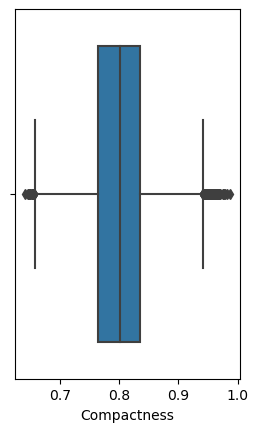

ShapeFactor1
Skewness :  -0.53


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


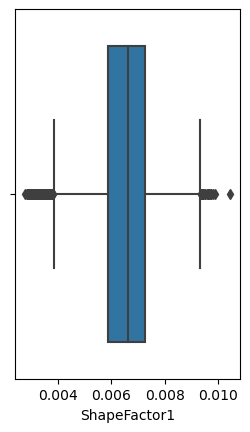

ShapeFactor2
Skewness :  0.294


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


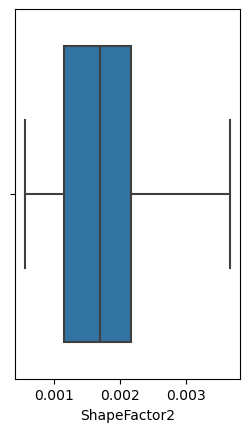

ShapeFactor3
Skewness :  0.243


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


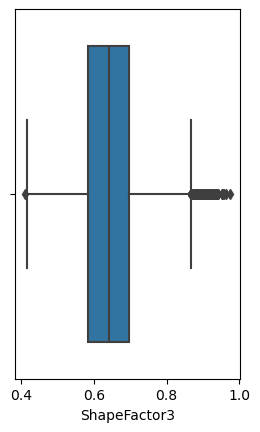

ShapeFactor4
Skewness :  -2.76


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3553422976.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


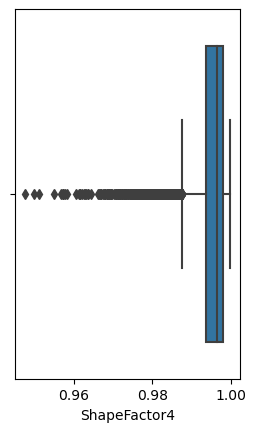

In [16]:
for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.ylabel("count")
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i])
        plt.show()  

In [17]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

# Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Class_Enc'] = df['Class'].map({'DERMASON':1, 'SIRA':2,'SEKER':3, 'HOROZ':4, 'CALI':5,'BARBUNYA':6, 'BOMBAY' :7}).astype(int)

In [19]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_Enc
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,3
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,3
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,3
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,3


In [20]:
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_Enc
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,1
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,1
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,1
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,1
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON,1


In [21]:
x = df[[
    'Area',
    'AspectRation',
    'Eccentricity',
    'Extent',
    'Solidity',
    'roundness',
    'Compactness',
    'ShapeFactor1',
    'ShapeFactor2',
    'ShapeFactor3',
    'ShapeFactor4']]
y = df[['Class_Enc']]

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1, stratify=y)

### Usage of Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

array([[-1.87197343e-01,  1.98708266e-01,  4.28831120e-01, ...,
        -3.21132237e-01, -3.28280119e-01,  5.42184791e-01],
       [-2.89464702e-01, -2.67018241e-01,  1.16981171e-02, ...,
         6.15163533e-02,  1.28211757e-01,  1.38940681e-01],
       [-3.20808542e-01, -4.13552565e-01, -1.45317419e-01, ...,
         2.12004525e-01,  3.05376985e-01,  6.46586906e-01],
       ...,
       [ 6.96862286e-01,  1.23435458e+00,  1.05998620e+00, ...,
        -1.22373888e+00, -1.16045837e+00,  7.72011260e-01],
       [-3.34863922e-01, -1.45151412e-01,  1.31964114e-01, ...,
         2.04688064e-02, -3.79840086e-04,  1.52910329e-01],
       [-8.31873077e-01, -2.92389468e-01, -1.44754728e-02, ...,
         8.12929381e-01,  1.53594918e-01,  6.67082851e-02]])

## Importing Training Models

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [25]:
!pip install xgboost

In [26]:
import xgboost as xgb

## KNN

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

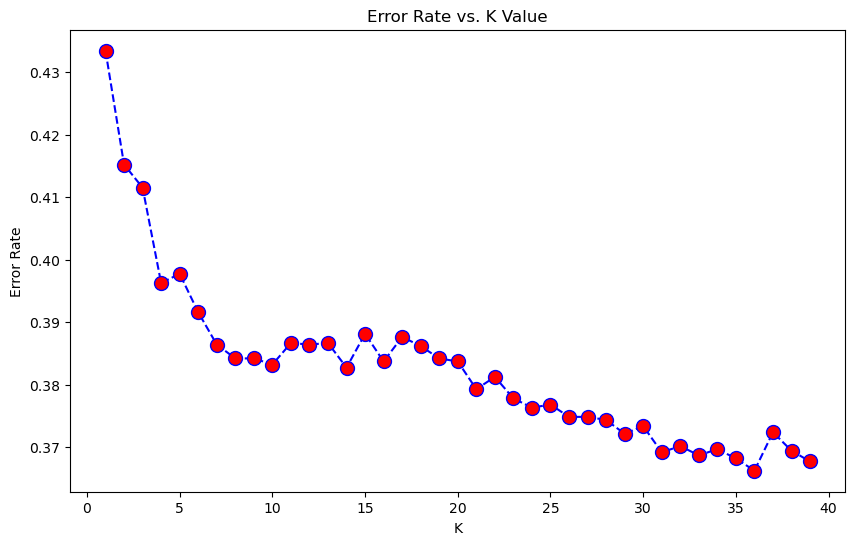

Minimum error:- 0.3662318483878907 at K = 36


In [27]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
    error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [28]:
knn = KNeighborsClassifier(n_neighbors=36, metric='euclidean')
knn.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=36)

In [29]:
from sklearn.metrics import confusion_matrix

y_pred1 = knn.predict(X_test)
confusion_matrix(y_test, y_pred1)

array([[898,  48, 118,   0,   0,   0,   0],
       [ 48, 588,  86,  69,   0,   0,   0],
       [209, 228, 158,  13,   0,   0,   0],
       [  9, 177,  11, 308,  16,  37,   0],
       [  0,   2,   0,  33, 391,  63,   0],
       [  0,  17,   0,  88, 216,  76,   0],
       [  0,   0,   0,   0,   0,   0, 156]], dtype=int64)

In [30]:
A=round(accuracy_score(y_test, y_pred1),3)
P=round(precision_score(y_test, y_pred1, average='weighted'),3)
R=round(recall_score(y_test, y_pred1, average='weighted'),3)
f1=round(f1_score(y_test, y_pred1, average='weighted'),3)

print("KNN:-")
print("Accuracy Score: ",A)
print("Precision Score: ",P)
print("Recall Score: ",R)
print("f1 Score: ",f1)

KNN:-
Accuracy Score:  0.634
Precision Score:  0.612
Recall Score:  0.634
f1 Score:  0.611


In [31]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.77      0.84      0.81      1064
           2       0.55      0.74      0.64       791
           3       0.42      0.26      0.32       608
           4       0.60      0.55      0.58       558
           5       0.63      0.80      0.70       489
           6       0.43      0.19      0.27       397
           7       1.00      1.00      1.00       156

    accuracy                           0.63      4063
   macro avg       0.63      0.63      0.62      4063
weighted avg       0.61      0.63      0.61      4063



## Decision Tree

In [32]:
ct =DecisionTreeClassifier(criterion="gini", max_depth=None) 
ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred2 = ct.predict(X_test)
confusion_matrix(y_test, y_pred2)

array([[938,  97,  23,   6,   0,   0,   0],
       [ 89, 648,  26,  20,   4,   4,   0],
       [ 20,  18, 565,   0,   0,   5,   0],
       [  3,  17,   0, 515,  18,   5,   0],
       [  0,   5,   2,  15, 436,  31,   0],
       [  0,  14,   4,   1,  25, 352,   1],
       [  0,   0,   0,   0,   0,   0, 156]], dtype=int64)

In [34]:
A_2=round(accuracy_score(y_test, y_pred2),3)
P_2=round(precision_score(y_test, y_pred2, average='weighted'),3)
R_2=round(recall_score(y_test, y_pred2, average='weighted'),3)
f1_2=round(f1_score(y_test, y_pred2, average='weighted'),3)

print("Decision Tree:-")
print("Accuracy Score: ",A_2)
print("Precision Score: ",P_2)
print("Recall Score: ",R_2)
print("f1 Score: ",f1_2)

Decision Tree:-
Accuracy Score:  0.889
Precision Score:  0.889
Recall Score:  0.889
f1 Score:  0.889


In [35]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.89      0.88      0.89      1064
           2       0.81      0.82      0.82       791
           3       0.91      0.93      0.92       608
           4       0.92      0.92      0.92       558
           5       0.90      0.89      0.90       489
           6       0.89      0.89      0.89       397
           7       0.99      1.00      1.00       156

    accuracy                           0.89      4063
   macro avg       0.90      0.90      0.90      4063
weighted avg       0.89      0.89      0.89      4063



In [36]:
X_train.columns

Index(['Area', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [37]:
df.value_counts('Class')

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
dtype: int64

[Text(0.5, 0.875, 'node #0\nArea <= 39172.5\ngini = 0.827\nsamples = 9480\nvalue = [2482, 1845, 1419, 1302, 1141, 925, 366]\nclass = DERMASON'),
 Text(0.25, 0.625, 'node #1\nShapeFactor1 <= 0.007\ngini = 0.451\nsamples = 3257\nvalue = [2296, 206, 715, 40, 0, 0, 0]\nclass = DERMASON'),
 Text(0.125, 0.375, 'node #2\nShapeFactor3 <= 0.747\ngini = 0.144\nsamples = 719\nvalue = [41, 14, 664, 0, 0, 0, 0]\nclass = SEKER'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #67\nArea <= 35443.0\ngini = 0.204\nsamples = 2538\nvalue = [2255, 192, 51, 40, 0, 0, 0]\nclass = DERMASON'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #426\nShapeFactor3 <= 0.53\ngini = 0.817\nsamples = 6223\nvalue = [186, 1639, 704, 1262, 1141, 925, 366]\nclass = SIRA'),
 Text(0.625, 0.375, 'node #427\nShapeFactor1 <= 0.006\ngini = 0.145\nsamples = 1247\nvalue = [0, 6, 0, 1150, 81, 6, 4]\nclass = HOROZ'),
 Tex

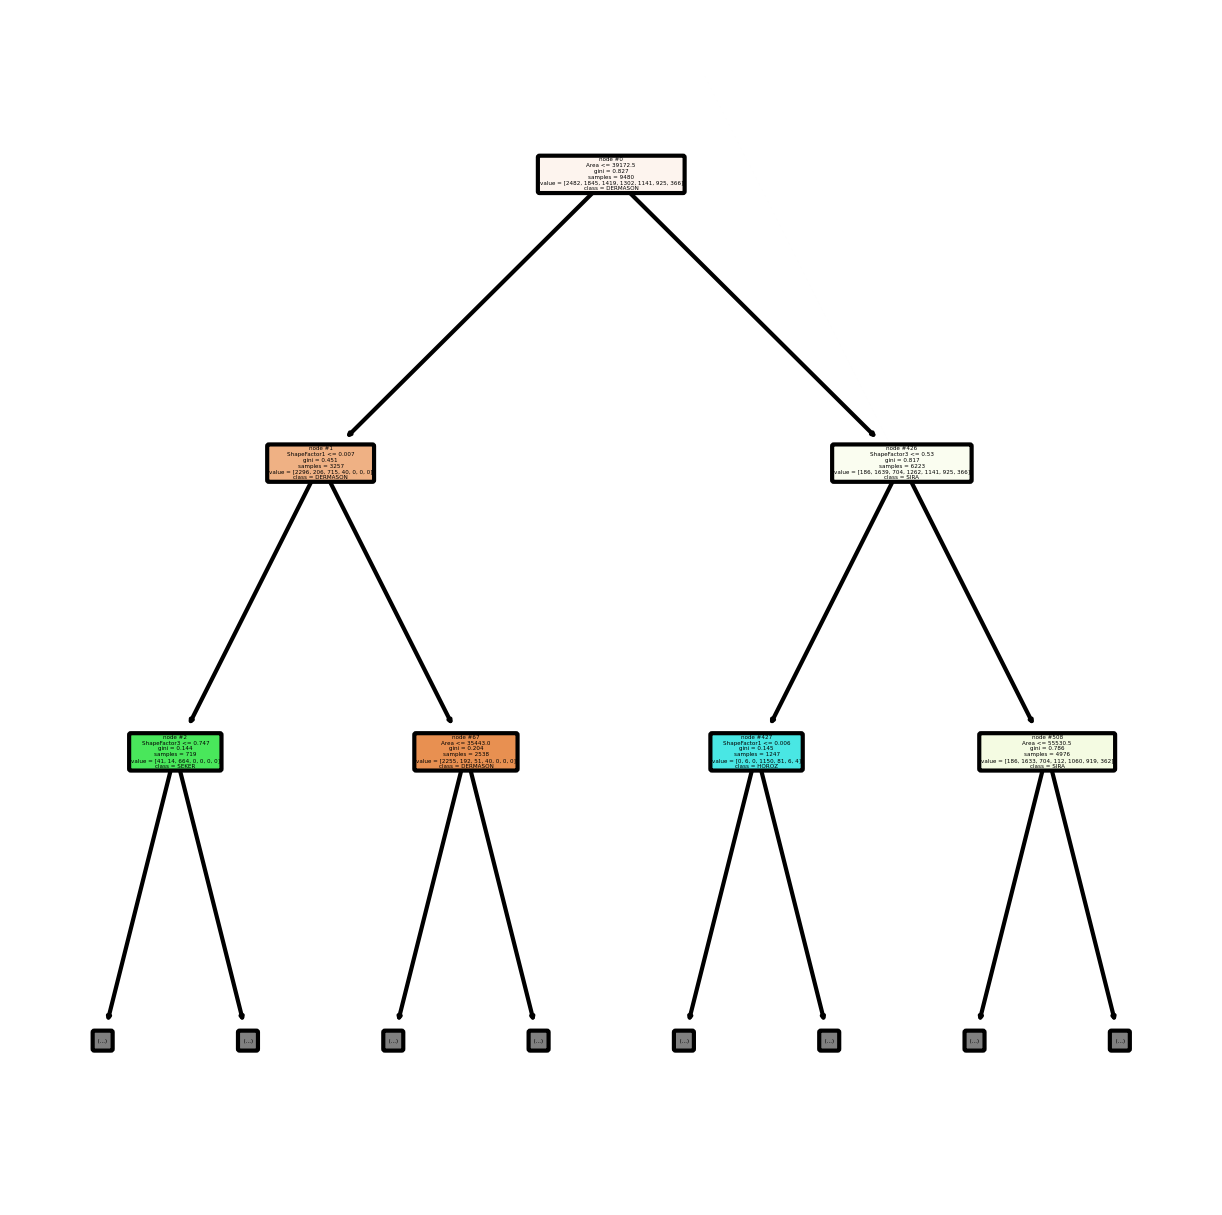

In [38]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 300)

tree.plot_tree(ct, max_depth =2,
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,
            node_ids = True, # Display node_id
            feature_names = ['Area', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
            class_names = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
              )

## Random Forest

In [39]:
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(X_train,y_train)

y_pred3=clf1.predict(X_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_1196\2581399090.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(X_train,y_train)


In [40]:
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.confusion_matrix(y_test, y_pred3)

array([[985,  58,  21,   0,   0,   0,   0],
       [ 67, 694,  16,  11,   1,   2,   0],
       [ 14,  11, 581,   0,   0,   2,   0],
       [  3,  13,   0, 530,  12,   0,   0],
       [  0,   5,   2,   4, 467,  11,   0],
       [  0,  12,   3,   1,  17, 364,   0],
       [  0,   0,   0,   0,   0,   0, 156]], dtype=int64)

In [55]:
A_3=round(metrics.accuracy_score(y_test, y_pred3),3)
P_3=round(precision_score(y_test, y_pred3, average='weighted'),3)
R_3=round(recall_score(y_test, y_pred3, average='weighted'),3)
f1_3=round(f1_score(y_test, y_pred3, average='weighted'),3)

print("Random Forest:-")
print("Accuracy Score: ",A_3)
print("Precision Score: ",P_3)
print("Recall Score: ",R_3)
print("f1 Score: ",f1_3)

Random Forest:-
Accuracy Score:  0.93
Precision Score:  0.93
Recall Score:  0.93
f1 Score:  0.93


In [56]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.92      0.93      0.92      1064
           2       0.88      0.88      0.88       791
           3       0.93      0.96      0.94       608
           4       0.97      0.95      0.96       558
           5       0.94      0.96      0.95       489
           6       0.96      0.92      0.94       397
           7       1.00      1.00      1.00       156

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



In [57]:
feature_imp = pd.Series(clf1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Area            0.197297
ShapeFactor1    0.177481
ShapeFactor3    0.118738
ShapeFactor2    0.114030
Compactness     0.098248
roundness       0.079601
Eccentricity    0.076922
AspectRation    0.061006
ShapeFactor4    0.036122
Solidity        0.025266
Extent          0.015289
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


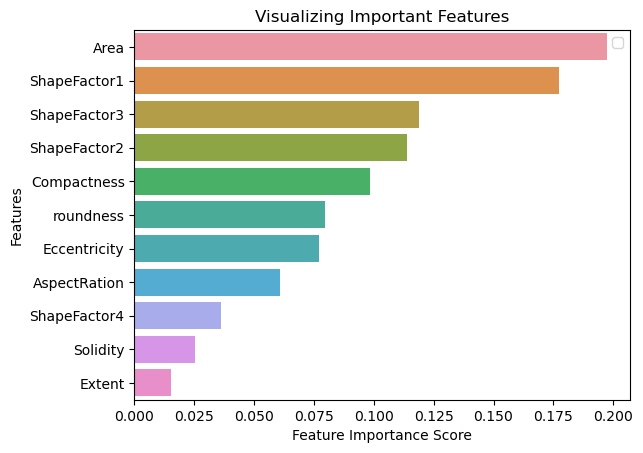

In [58]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

[Text(0.5, 0.875, 'Area <= 39172.5\ngini = 0.827\nsamples = 6016\nvalue = [2456, 1875, 1439, 1337, 1111, 899, 363]\nclass = DERMASON'),
 Text(0.25, 0.625, 'Compactness <= 0.871\ngini = 0.454\nsamples = 2052\nvalue = [2278, 205, 726, 38, 0, 0, 0]\nclass = DERMASON'),
 Text(0.125, 0.375, 'Area <= 35443.0\ngini = 0.211\nsamples = 1594\nvalue = [2219, 202, 51, 38, 0, 0, 0]\nclass = DERMASON'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Eccentricity <= 0.626\ngini = 0.155\nsamples = 458\nvalue = [59, 3, 675, 0, 0, 0, 0]\nclass = SEKER'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'AspectRation <= 1.866\ngini = 0.815\nsamples = 3964\nvalue = [178, 1670, 713, 1299, 1111, 899, 363]\nclass = SIRA'),
 Text(0.625, 0.375, 'Area <= 55911.5\ngini = 0.783\nsamples = 3165\nvalue = [178, 1664, 713, 106, 1048, 889, 359]\nclass = SIRA'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125,

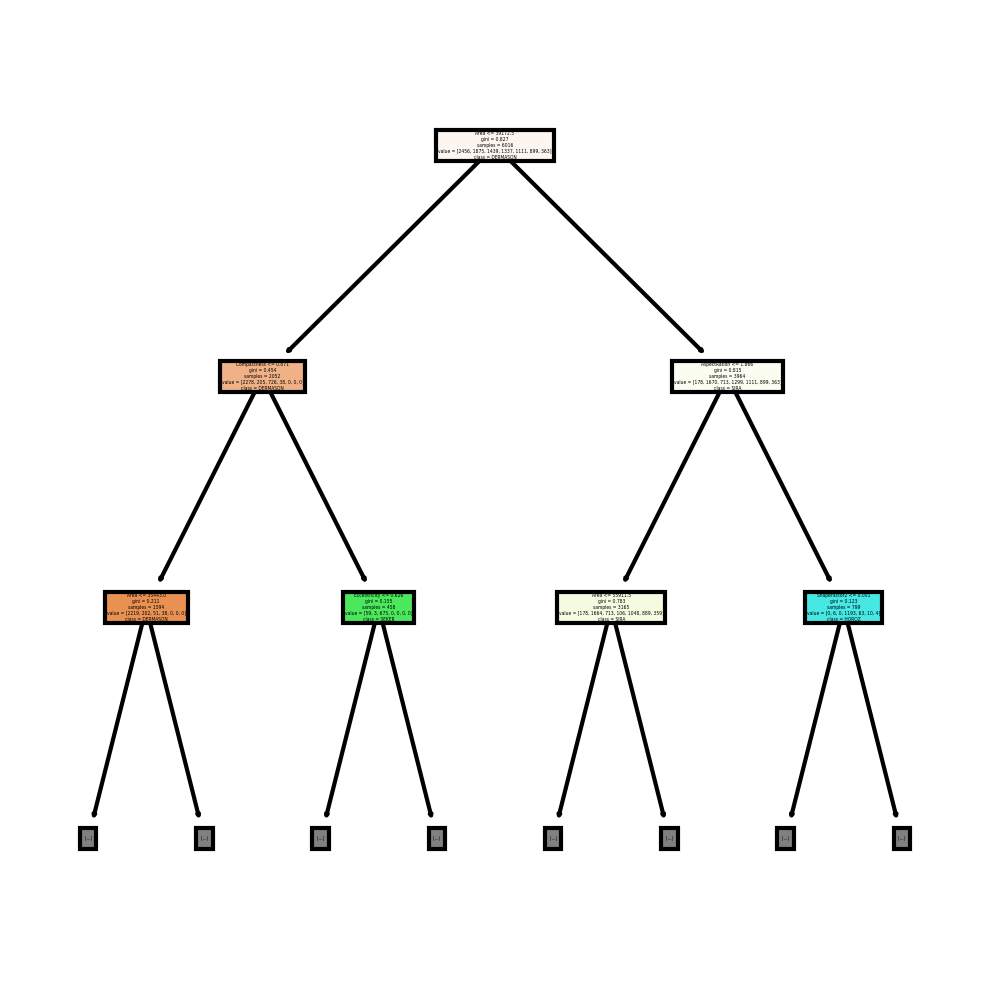

In [59]:
fn=X_train.columns
cn=['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf1.estimators_[0],
               max_depth=2,
               feature_names = fn, 
               class_names=cn,
               filled = True)

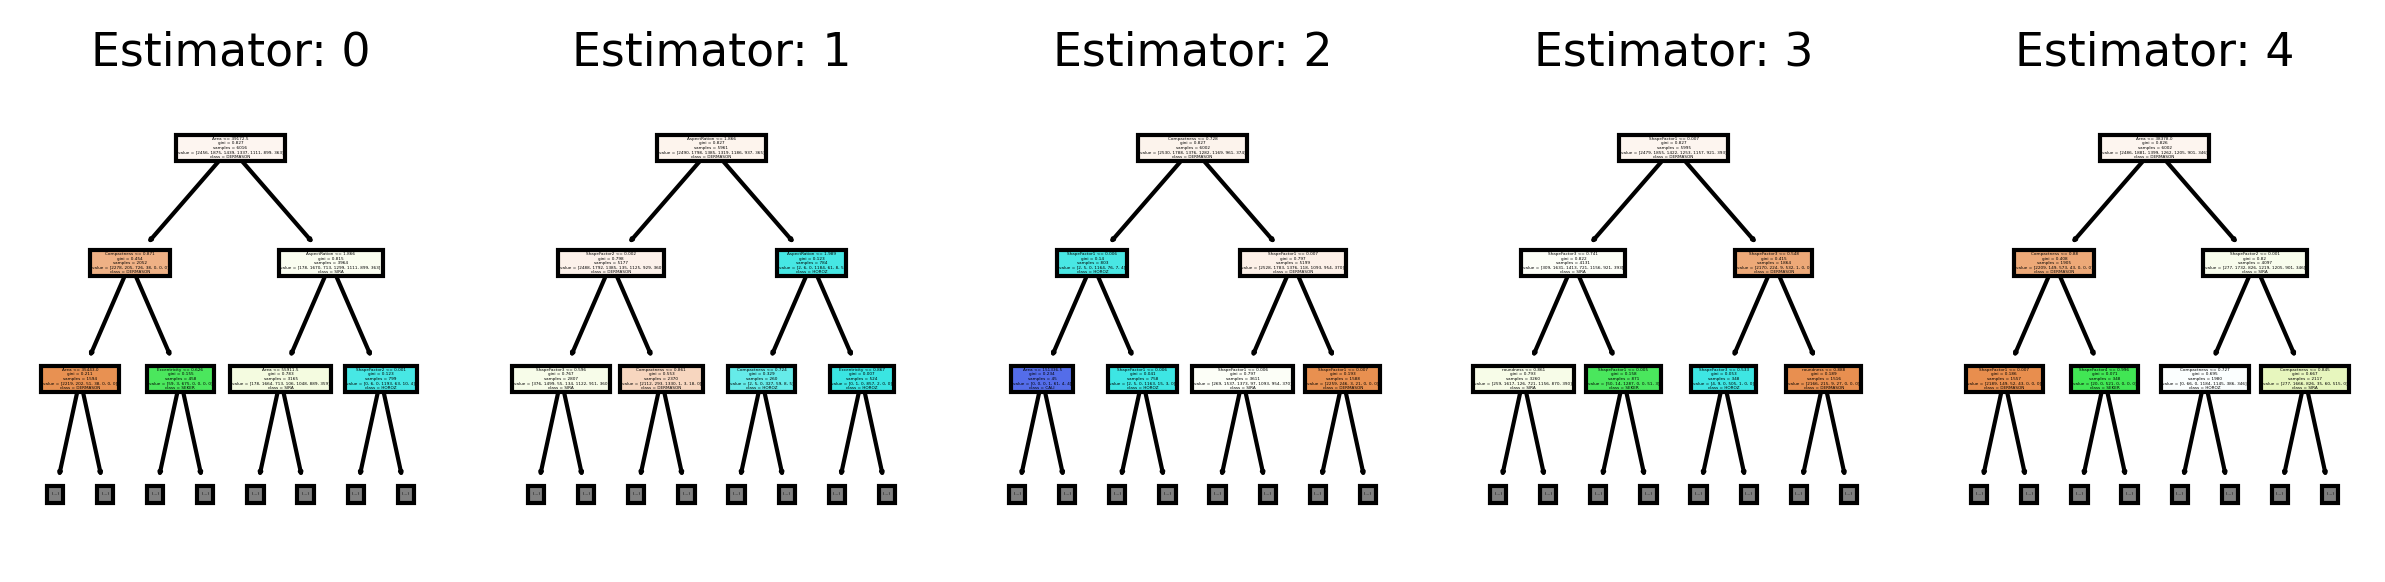

In [60]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=300)
for index in range(0, 5):
    tree.plot_tree(clf1.estimators_[index],
                   max_depth=2,
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

## XGBOOST

In [61]:
model = xgb.XGBClassifier()

P=y_train-1  # If the unique values start from 1, adjust them to start from 0
Q=y_test-1
model.fit(X_train, P)

y_pred4=model.predict(X_test)

In [62]:
metrics.confusion_matrix(Q, y_pred4)

array([[985,  63,  16,   0,   0,   0,   0],
       [ 72, 694,  14,   7,   1,   3,   0],
       [ 16,  15, 574,   0,   0,   3,   0],
       [  3,  13,   0, 526,  14,   2,   0],
       [  0,   4,   2,   6, 463,  13,   1],
       [  0,  11,   2,   0,  15, 369,   0],
       [  0,   0,   0,   0,   0,   0, 156]], dtype=int64)

In [63]:
A_4=round(metrics.accuracy_score(Q, y_pred4),3)
P_4=round(precision_score(Q, y_pred4, average='weighted'),3)
R_4=round(recall_score(Q, y_pred4, average='weighted'),3)
f1_4=round(f1_score(Q, y_pred4, average='weighted'),3)

print("XGBOOST:-")
print("Accuracy Score: ",A_4)
print("Precision Score: ",P_4)
print("Recall Score: ",R_4)
print("f1 Score: ",f1_4)

XGBOOST:-
Accuracy Score:  0.927
Precision Score:  0.928
Recall Score:  0.927
f1 Score:  0.927


In [64]:
print(classification_report(Q, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1064
           1       0.87      0.88      0.87       791
           2       0.94      0.94      0.94       608
           3       0.98      0.94      0.96       558
           4       0.94      0.95      0.94       489
           5       0.95      0.93      0.94       397
           6       0.99      1.00      1.00       156

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



## Selecting The Best Method:-

### KNN:-
Accuracy Score:  0.634;
 Precision Score:  0.612;
 Recall Score:  0.634;
 f1 Score:  0.611
### Decision Tree:-
Accuracy Score:  0.889;
 Precision Score:  0.889;
 Recall Score:  0.889;
 f1 Score:  0.889;
### Random Forest:-
Accuracy Score:  0.93;
 Precision Score:  0.93;
 Recall Score:  0.93;
 f1 Score:  0.93;
### XGBOOST:-
Accuracy Score:  0.927;
 Precision Score:  0.928;
 Recall Score:  0.927;
 f1 Score:  0.927
#### Since our dataset is a balanced dataset therefore we can check the Accuracy Score for finalizing which is the best model for our dataset. From the above data points if we compare the Accuracy Score for all the 4 methods we will see that Random forest and XGBOOST are having almost the same Accuracy Score also if we check the f1 Score for all the 4 methods we will see that both Random Forest and XGBOOST are having the higest f1 Score. Therefore, we can conclude either of 'Random Forest' or 'XGBOOST' can be used in this dataset for classification purpose. 